Chọn phương pháp biến đổi ảnh:
I - Image Inverse
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching


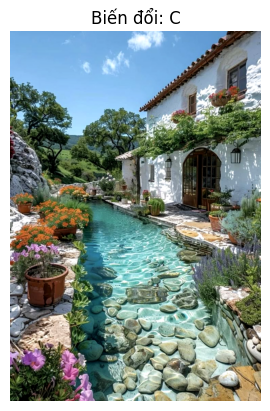

✅ Đã lưu: suoi_C.jpg


In [ ]:
import os
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from skimage import exposure, img_as_ubyte
from skimage.util import img_as_float
from skimage.exposure import rescale_intensity

input_folder = 'exercise'
output_folder = 'output_bai1'
os.makedirs(output_folder, exist_ok=True)


def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_float = img_as_float(img)
    corrected = np.power(img_float, 1 / gamma)
    return img_as_ubyte(corrected)

def log_transform(img):
    img_float = img_as_float(img)
    log_img = np.log1p(img_float)
    log_img /= np.max(log_img)
    return img_as_ubyte(log_img)

def histogram_equalization(img):
    if len(img.shape) == 3:
        img = np.mean(img, axis=2).astype(np.uint8)  # Chuyển về ảnh xám
    return img_as_ubyte(exposure.equalize_hist(img))

def contrast_stretching(img):
    p2, p98 = np.percentile(img, (2, 98))
    stretched = rescale_intensity(img, in_range=(p2, p98))
    return stretched


print("Chọn phương pháp biến đổi ảnh:")
print("I - Image Inverse")
print("G - Gamma Correction")
print("L - Log Transformation")
print("H - Histogram Equalization")
print("C - Contrast Stretching")

choice = input("Nhập lựa chọn (I/G/L/H/C): ").upper()


for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png', '.bmp')):
        img_path = os.path.join(input_folder, filename)
        img = iio.imread(img_path)

        if choice == 'I':
            result = inverse_image(img)
        elif choice == 'G':
            result = gamma_correction(img)
        elif choice == 'L':
            result = log_transform(img)
        elif choice == 'H':
            result = histogram_equalization(img)
        elif choice == 'C':
            result = contrast_stretching(img)
        else:
            print("❌ Lựa chọn không hợp lệ.")
            break

     
        plt.imshow(result, cmap='gray' if len(result.shape)==2 else None)
        plt.title(f"Biến đổi: {choice}")
        plt.axis('off')
        plt.show()

        save_name = f"{os.path.splitext(filename)[0]}_{choice}.jpg"
        iio.imwrite(os.path.join(output_folder, save_name), result)
        print(f"✅ Đã lưu: {save_name}")


Chọn phương pháp biến đổi ảnh:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter


C:\Users\Linh\AppData\Local\Temp\ipykernel_13084\1435948229.py:31: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (cutoff / D)**(2 * order))


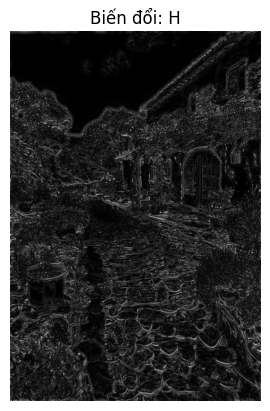

✅ Đã lưu: suoi_H.jpg


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
from scipy.fft import fft2, ifft2, fftshift, ifftshift

input_folder = 'exercise'
output_folder = 'output_bai2'
os.makedirs(output_folder, exist_ok=True)

def apply_fft(img):
    gray = to_gray(img)
    f = fft2(gray)
    fshift = fftshift(f)
    magnitude_spectrum = np.log(1 + np.abs(fshift))
    return magnitude_spectrum

def butterworth_filter(shape, cutoff, order=2, filter_type='low'):
    M, N = shape
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(v - N//2, u - M//2)
    D = np.sqrt(U**2 + V**2)

    if filter_type == 'low':
        H = 1 / (1 + (D / cutoff)**(2 * order))
    else:
        H = 1 / (1 + (cutoff / D)**(2 * order))
    return H


def apply_butterworth(img, cutoff=30, filter_type='low'):
    gray = to_gray(img)
    f = fft2(gray)
    fshift = fftshift(f)
    H = butterworth_filter(gray.shape, cutoff, filter_type=filter_type)
    f_filtered = fshift * H
    img_back = np.abs(ifft2(ifftshift(f_filtered)))
    return np.clip(img_back, 0, 255).astype(np.uint8)


def to_gray(img):
    if len(img.shape) == 3:
        return np.mean(img, axis=2).astype(np.uint8)
    return img

print("Chọn phương pháp biến đổi ảnh:")
print("F - Fast Fourier Transform")
print("L - Butterworth Lowpass Filter")
print("H - Butterworth Highpass Filter")

choice = input("Nhập lựa chọn (F/L/H): ").upper()

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png', '.bmp')):
        img_path = os.path.join(input_folder, filename)
        img = iio.imread(img_path)

        if choice == 'F':
            result = apply_fft(img)
            cmap = 'gray'
        elif choice == 'L':
            result = apply_butterworth(img, cutoff=30, filter_type='low')
            cmap = 'gray'
        elif choice == 'H':
            result = apply_butterworth(img, cutoff=30, filter_type='high')
            cmap = 'gray'
        else:
            print("❌ Lựa chọn không hợp lệ.")
            break

        # Hiển thị và lưu ảnh
        plt.imshow(result, cmap=cmap)
        plt.title(f"Biến đổi: {choice}")
        plt.axis('off')
        plt.show()

        save_name = f"{os.path.splitext(filename)[0]}_{choice}.jpg"
        iio.imwrite(os.path.join(output_folder, save_name), result.astype(np.uint8))
        print(f"✅ Đã lưu: {save_name}")


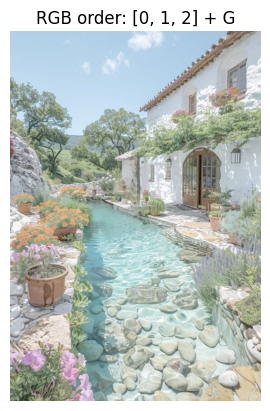

✅ Đã lưu: suoi_RGB012_G.jpg


In [ ]:
import os
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from skimage import exposure, img_as_ubyte
from skimage.util import img_as_float
from skimage.exposure import rescale_intensity
import random

input_folder = 'exercise'
output_folder = 'output_bai3'
os.makedirs(output_folder, exist_ok=True)

def random_rgb_swap(img):
    channels = [0, 1, 2]
    random.shuffle(channels)
    swapped = img[:, :, channels]
    return swapped, channels

def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_float = img_as_float(img)
    corrected = np.power(img_float, 1 / gamma)
    return img_as_ubyte(corrected)

def log_transform(img):
    img_float = img_as_float(img)
    log_img = np.log1p(img_float)
    log_img /= np.max(log_img)
    return img_as_ubyte(log_img)

def histogram_equalization(img):
    if len(img.shape) == 3:
        img = np.mean(img, axis=2).astype(np.uint8)
    return img_as_ubyte(exposure.equalize_hist(img))

def contrast_stretching(img):
    p2, p98 = np.percentile(img, (2, 98))
    return rescale_intensity(img, in_range=(p2, p98))

transformations = {
    'I': inverse_image,
    'G': gamma_correction,
    'L': log_transform,
    'H': histogram_equalization,
    'C': contrast_stretching
}

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png', '.bmp')):
        img_path = os.path.join(input_folder, filename)
        img = iio.imread(img_path)

        img_swapped, channel_order = random_rgb_swap(img)

        transform_key = random.choice(list(transformations.keys()))
        transformed = transformations[transform_key](img_swapped)

        plt.imshow(transformed, cmap='gray' if len(transformed.shape)==2 else None)
        plt.title(f"RGB order: {channel_order} + {transform_key}")
        plt.axis('off')
        plt.show()

        new_name = f"{os.path.splitext(filename)[0]}_RGB{''.join(map(str, channel_order))}_{transform_key}.jpg"
        iio.imwrite(os.path.join(output_folder, new_name), transformed)
        print(f"✅ Đã lưu: {new_name}")


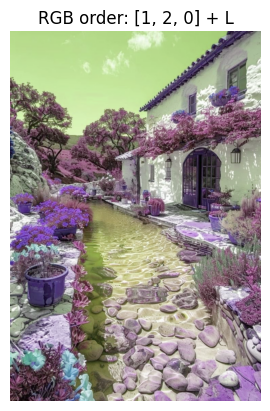

Đã lưu: suoi_RGB120_L.jpg


In [ ]:
import os
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from skimage import exposure, img_as_ubyte, img_as_float, color
from skimage.exposure import rescale_intensity
from scipy.ndimage import minimum_filter, maximum_filter
import random

input_folder = 'exercise'
output_folder = 'output_bai4'
os.makedirs(output_folder, exist_ok=True)

def random_rgb_swap(img):
    order = [0, 1, 2]
    random.shuffle(order)
    return img[:, :, order], order

def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_float = img_as_float(img)
    corrected = np.power(img_float, 1 / gamma)
    return img_as_ubyte(corrected)

def log_transform(img):
    img_float = img_as_float(img)
    log_img = np.log1p(img_float)
    log_img /= np.max(log_img)
    return img_as_ubyte(log_img)

def histogram_equalization(img):
    if img.ndim == 3:
        img = color.rgb2gray(img)
    eq = exposure.equalize_hist(img)
    return img_as_ubyte(eq)

def contrast_stretching(img):
    p2, p98 = np.percentile(img, (2, 98))
    return img_as_ubyte(rescale_intensity(img, in_range=(p2, p98)))

def butterworth_filter(img_gray, d0=30, n=2, highpass=False):
    img_float = img_as_float(img_gray)
    f = np.fft.fft2(img_float)
    fshift = np.fft.fftshift(f)

    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    D = np.sqrt((u - ccol)**2 + (v - crow)**2)

    if highpass:
        H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n))
    else:
        H = 1 / (1 + (D / d0)**(2 * n))

    G = fshift * H
    ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(ishift)
    return img_as_ubyte(np.abs(img_back))

def apply_min_filter(img, size=3):
    return minimum_filter(img, size=size)

def apply_max_filter(img, size=3):
    return maximum_filter(img, size=size)

transformations = {
    'I': inverse_image,
    'G': gamma_correction,
    'L': log_transform,
    'H': histogram_equalization,
    'C': contrast_stretching,
    'BL': lambda img: butterworth_filter(color.rgb2gray(img), highpass=False),
    'BH': lambda img: butterworth_filter(color.rgb2gray(img), highpass=True)
}

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png', '.bmp')):
        img_path = os.path.join(input_folder, filename)
        img = iio.imread(img_path)

        img_rgb, rgb_order = random_rgb_swap(img)

        transform_key = random.choice(list(transformations.keys()))
        transformed = transformations[transform_key](img_rgb)

        if transform_key == 'BL':
            transformed = apply_min_filter(transformed)
        elif transform_key == 'BH':
            transformed = apply_max_filter(transformed)

        plt.imshow(transformed, cmap='gray' if transformed.ndim == 2 else None)
        plt.title(f"RGB order: {rgb_order} + {transform_key}")
        plt.axis('off')
        plt.show()

        output_name = f"{os.path.splitext(filename)[0]}_RGB{''.join(map(str, rgb_order))}_{transform_key}.jpg"
        output_path = os.path.join(output_folder, output_name)
        iio.imwrite(output_path, transformed)
        print(f"Đã lưu: {output_name}")
